<a href="https://colab.research.google.com/github/pascal-maker/Python/blob/master/Labo_10_Herhalingslabo_Opgave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <span style="color:purple"> Labo 10 - Herhalingslabo

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn import datasets, linear_model


pd.set_option('display.max_columns', 500)

 ## <span style="color:darkorange"> Discrete kansverdelingen

Oef 1: Het aantal fouten in een glasvezelkabel volgt een Poisson kansverdeling. Veronderstel dat het gemiddeld aantal fouten in 50 meter kabel 1,2 bedraagt.

a. Wat is de kans dat er exact 3 fouten in 150 meter glasvezelkabel zitten?

In [4]:
# gemiddeld mag je 3x1,2 = 3,6 fouten verwachten per 150 meter kabel
p = stats.poisson.pmf(3,3.6)
print('Kans op exact drie fouten bedraagt:', p)


Kans op exact drie fouten bedraagt: 0.21246926575014694


b. Wat is de kans dat er minstens twee fouten in 100 meter glasvezelkabel zitten?

In [5]:
kansb = 1 - stats.poisson.cdf(1,2.4)
print(kansb)

0.6915589588159976


c. Wat is de kans dat er in 200 meter kabel minder dan 2 fouten zitten?

In [6]:
 kansc = stats.poisson.cdf(1,4.8)
 print(kansc)

0.04773253288431617


d. Een glasvezelkabel is 100 meter lang. Wat is de kans dat er in de eerste 50 meter exact 1 fout zit en exact 1 fout in de tweede 50 meter?

In [7]:
kansd = stats.poisson.pmf(1,1.2) *  stats.poisson.pmf(1,1.2)
print(kansd)

0.13063385273675404


Oef 2: De bus van 8u30 is 30% van de keren te laat. Beantwoord onderstaande vragen:

a. Wat is de kans dat de bus de volgende week (= 7 dagen) nooit te laat zal zijn? Welke kansverdeling zal je hiervoor hanteren?

In [8]:
pr = stats.binom.pmf(0,7,0.3)
print(pr)

0.08235430000000003


b. Wat is de kans dat de bus meer dan 4 van de zeven dagen te laat zal  zijn?

In [9]:
kansdatb = 1 - stats.binom.cdf(4,7,0.3)
print(kansdatb)

0.028795499999999974


c. Wat is de kans dat de komende maand (= 30 dagen) de bus exact 10 dagen te laat zal zijn?

In [10]:
kansdatc = stats.binom.pmf(10,30,0.3)
print(kansdatc)

0.14156170106200108


d. Wat is de kans dat de komende maand de bus minder dan 7 dagen te laat zal zijn?

In [11]:
kansdatd = stats.binom.cdf(6,30,0.3)
print(kansdatd)

0.15952298219587446


Bepaal het aantal dagen per maand waarvoor er minder dan 10 procent kans bestaat dat de bus er meer dan dit aantal te laat zal zijn.

In [12]:
kanse = stats.binom.isf(0.1,30,0.3)
print(kanse)

12.0


 ## <span style="color:darkorange"> Normaalverdeling

Oef 3: De levensduur van een toestel is normaal verdeeld met een gemiddelde van 12 maanden en een standaardafwijking van 2 maanden.

a. Bepaal de kans dat het toestel binnen de 7 maanden stuk gaat.

In [13]:
stats.norm.cdf(7,12,2)

np.float64(0.006209665325776132)

b. Bepaal de kans dat het toestel langer dan 15 maanden meegaat.

In [14]:
 kansbtoestel =  1- stats.norm.cdf(15,12,2)
 print(kansbtoestel)

0.06680720126885809


c. Bepaal de kans dat het toestel tijdens de 10de maand stuk gaat.

In [15]:
kansctoestel = stats.norm.cdf(10,12,2) - stats.norm.cdf(9,12,2)
print(kansctoestel)

0.091848052662599


d. Binnen hoeveel tijd gaan de 10% minst duurzame toestellen stuk?

In [16]:
 print(stats.norm.ppf(0.1,12,2))

9.4368968689108


 ## <span style="color:darkorange"> Data cleaning en regressie

Hier is een duidelijke uitleg van al jouw oefeningen en gebruikte code in dit herhalingslabo, opgedeeld per oefening:

---

## 🔶 **Oef 1: Poissonverdeling**

> Gebruik je wanneer je het aantal gebeurtenissen telt in een bepaalde tijd of ruimte, gegeven een gemiddeld aantal gebeurtenissen per eenheid.

### a. **Exact 3 fouten in 150 meter kabel**

```python
p = stats.poisson.pmf(3, 3.6)
```

* **`pmf` = probability mass function** → kans op exact 3 fouten.
* In 50 meter heb je gemiddeld 1.2 fouten → in 150 meter is dat 3 × 1.2 = **3.6 fouten**
* Dus: wat is de kans op **exact 3 fouten bij een gemiddelde van 3.6**?

---

### b. **Minstens 2 fouten in 100 meter kabel**

```python
kansb = 1 - stats.poisson.cdf(1, 2.4)
```

* Gemiddelde = $2 \times 1.2 = 2.4$
* `cdf(1, 2.4)` = kans op **0 of 1 fouten**
* $P(X \geq 2) = 1 - P(X \leq 1)$

---

### c. **Minder dan 2 fouten in 200 meter kabel**

```python
kansc = stats.poisson.cdf(1, 4.8)
```

* 4 × 50 meter = 4.8 fouten verwacht
* `cdf(1, 4.8)` = kans op 0 of 1 fout
* Dus $P(X < 2)$

---

### d. **Exact 1 fout in elk van de twee helften van 100 meter**

```python
kansd = stats.poisson.pmf(1,1.2) *  stats.poisson.pmf(1,1.2)
```

* Beide 50 meters hebben gemiddeld 1.2 fouten
* Kans op 1 fout in elk stuk zijn **onafhankelijke gebeurtenissen** → vermenigvuldigen

---

## 🔶 **Oef 2: Binomiale verdeling**

> Wanneer je een experiment hebt met vaste kansen op “succes” of “falen” over een aantal herhalingen.

### a. **Nooit te laat in 7 dagen (P(X=0))**

```python
pr = stats.binom.pmf(0, 7, 0.3)
```

* `pmf(0, 7, 0.3)` = kans op exact **0 keer te laat** (7 keer op tijd)
* Binomiaal: 7 pogingen, kans op te laat = 30%

---

### b. **Meer dan 4 keer te laat in 7 dagen**

```python
kansdatb = 1 - stats.binom.cdf(4, 7, 0.3)
```

* `cdf(4, 7, 0.3)` = kans op max 4 keer te laat
* Dus $P(X > 4) = 1 - P(X \leq 4)$

---

### c. **Exact 10 keer te laat in 30 dagen**

```python
kansdatc = stats.binom.pmf(10, 30, 0.3)
```

* Precies 10 keer te laat in 30 dagen

---

### d. **Minder dan 7 keer te laat in 30 dagen**

```python
kansdatd = stats.binom.cdf(6, 30, 0.3)
```

* Kans op max 6 keer te laat → $P(X < 7) = P(X \leq 6)$

---

### e. **Voor hoeveel dagen is kans op meer te laat zijn < 10%?**

```python
kanse = stats.binom.isf(0.1, 30, 0.3)
```

* `isf = inverse survival function = 1 - cdf`
* Dit geeft de **grenswaarde zodanig dat er minder dan 10% kans is dat de bus vaker dan dat aantal dagen te laat is**.

---

## 🔶 **Oef 3: Normaalverdeling**

> Voor continue variabelen die een klokvormige verdeling volgen (zoals levensduur, lengte, enz.).

### a. **Kans dat toestel binnen 7 maanden stuk gaat**

```python
stats.norm.cdf(7, 12, 2)
```

* `cdf(7, 12, 2)` = kans dat waarde ≤ 7 (links van 7)
* Dus: P(X ≤ 7) als levensduur \~ N(12, 2²)

---

### b. **Langer dan 15 maanden meegaat**

```python
kansbtoestel = 1 - stats.norm.cdf(15, 12, 2)
```

* 1 - kans op ≤ 15 maanden → dus kans op > 15

---

### c. **Tijdens de 10de maand stuk gaat**

```python
kansctoestel = stats.norm.cdf(10, 12, 2) - stats.norm.cdf(9, 12, 2)
```

* Kans dat het stuk gaat tussen maand 9 en 10 = P(9 < X < 10)

---

### d. **10% minst duurzame toestellen: wanneer stuk?**

```python
print(stats.norm.ppf(0.1, 12, 2))
```

* `ppf` = percent point function → inverse van `cdf`
* Geeft het **grenspunt** waarvoor 10% van de toestellen **eerder dan dat moment** stuk gaan

---

Laat me weten als je dit als samenvatting in een mooi tabelletje wil of als je grafieken erbij wil!


Oef 4: De dataset autos.csv bevat gegevens gegevens van tweedehands auto's die op Ebay worden verkocht.
Werk onderstaande vragen uit.

In [17]:
dataset= pd.read_csv('autos.csv', sep=',', header=0, encoding='cp1252')
dataset.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [18]:
# Hoveel rijen bevat de dataset?
dataset.shape[0]



371528

Verwijder de volgende kolommen: 'dateCrawled', 'offerType', 'seller', 'monthOfRegistration', 'notRepairedDamage', 'nrOfPictures', 'postalCode', 'lastSeen', 'dateCreated'

In [19]:
# Verwijderen van de kolom seller
dataset_clean = dataset.drop(['dateCrawled', 'offerType', 'seller', 'monthOfRegistration', 'notRepairedDamage', 'nrOfPictures', 'postalCode', 'lastSeen', 'dateCreated'], axis=1)
dataset_clean.head()


,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand
0,Golf_3_1.6,480,test,NaN,1993,manuell,0,golf,150000,benzin,volkswagen
1,A5_Sportback_2.7_Tdi,18300,test,coupe,2011,manuell,190,NaN,125000,diesel,audi
2,"Jeep_Grand_Cherokee_""Overland""",9800,test,suv,2004,automatik,163,grand,125000,diesel,jeep
3,GOLF_4_1_4__3TÜRER,1500,test,kleinwagen,2001,manuell,75,golf,150000,benzin,volkswagen
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,test,kleinwagen,2008,manuell,69,fabia,90000,diesel,skoda


Geef een overzicht van hoeveel ontbrekende waarden er in elke kolom van de dataset voorkomen.

In [20]:
# Aantal ontbrekende waarden
dataset.isnull().sum()


,0
dateCrawled,0
name,0
seller,0
offerType,0
price,0
abtest,0
vehicleType,37869
yearOfRegistration,0
gearbox,20209
powerPS,0


Verwijder alle rijen met ontbrekende waarden (listwise deletion)

In [21]:
# Verwijder alle rijen met ontbrekende waarden (listwise deletion)
dataset_clean.dropna(inplace=True)
dataset_clean.isnull().sum()



,0
name,0
price,0
abtest,0
vehicleType,0
yearOfRegistration,0
gearbox,0
powerPS,0
model,0
kilometer,0
fuelType,0


In [22]:
dataset.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


Verwijder alle rijen waarbij de numerieke waarden gelijk zijn aan 0.
Verwijder alle rijen waarbij het aantal pk (powerPS) kleiner is dan 10

In [25]:
# Verwijder rijen met een 0 in eender welke numerieke kolom
dataset = dataset[(dataset.select_dtypes(include='number') != 0).all(axis=1)]

# Verwijder rijen waarbij powerPS kleiner is dan 10
dataset = dataset[dataset['powerPS'] > 10]

# Samenvatting
dataset.describe()


,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Verwijder in de kolommen 'price' en 'powerPS' alle uitschieters. Beschouw uitschieters hier als de waarden die meer dan 10 standaardafwijkingen van het gemiddelde zijn gelegen.

In [26]:
dataset_clean = dataset_clean[(np.abs(stats.zscore(dataset_clean['price'])) < 10)]
dataset_clean = dataset_clean[(np.abs(stats.zscore(dataset_clean['powerPS'])) < 10)]

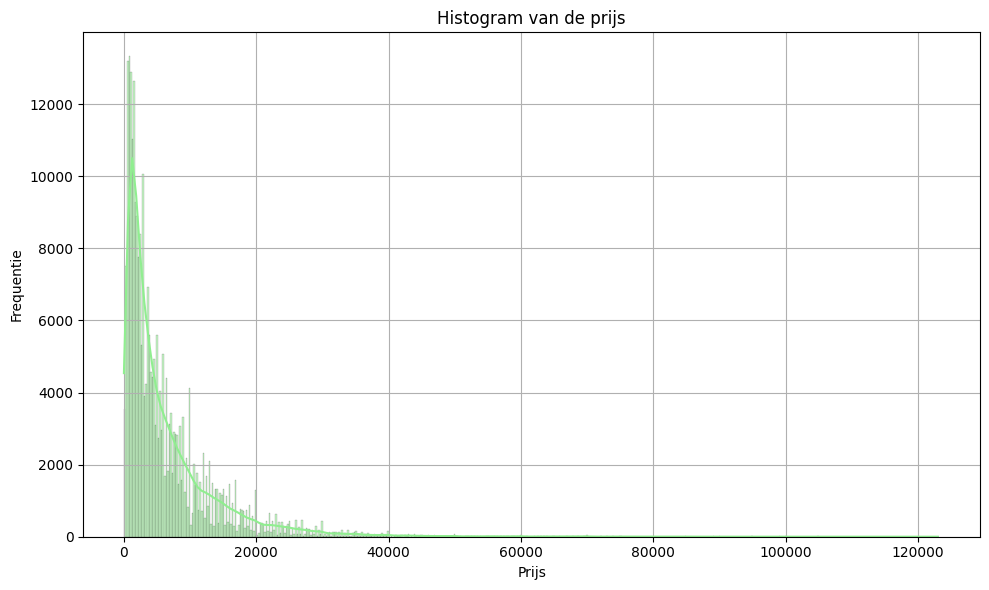

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#bepaal de klassenbreedte
klassenbreedte = (dataset_clean['price'].max() - dataset_clean['price'].min()) / np.sqrt(dataset_clean['price'].count())
bins = np.arange(dataset_clean['price'].min(),dataset_clean['price'].max() + klassenbreedte,klassenbreedte)
#teken histogram
plt.figure(figsize=(10,6))
sns.histplot(dataset_clean['price'],bins=bins,kde=True,color='lightgreen')
plt.title('Histogram van de prijs')
plt.xlabel('Prijs')
plt.ylabel('Frequentie')
plt.grid(True)
plt.tight_layout()
plt.show()




Teken een histogram van de prijs (price). Bepaal op voorhand het aantal klasses en geef dit aantal mee met de bin parameter van de functie sns.distplot().

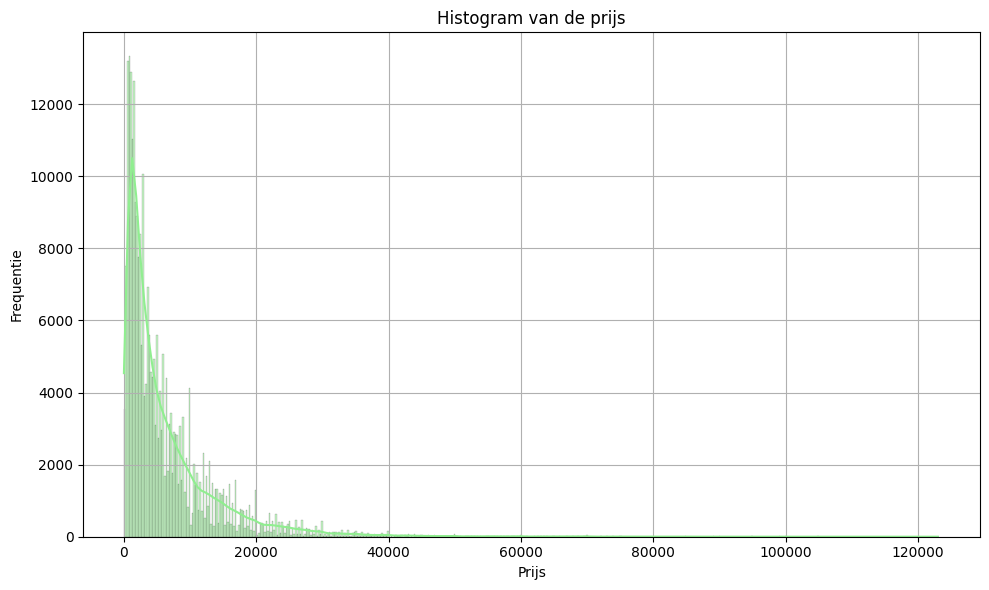

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Bepaal klassenbreedte
class_width = (dataset_clean['price'].max() - dataset_clean['price'].min()) / np.sqrt(dataset_clean['price'].count())
bins = np.arange(dataset_clean['price'].min(), dataset_clean['price'].max() + class_width, class_width)

# Teken histogram
plt.figure(figsize=(10, 6))
sns.histplot(dataset_clean['price'], bins=bins, kde=True, color='lightgreen')
plt.title('Histogram van de prijs')
plt.xlabel('Prijs')
plt.ylabel('Frequentie')
plt.grid(True)
plt.tight_layout()
plt.show()


Stel grafisch de verdeling van 'fuel_Type'weer. Gebruik sns.countplot(). Wat is het populairste brandstoftype?

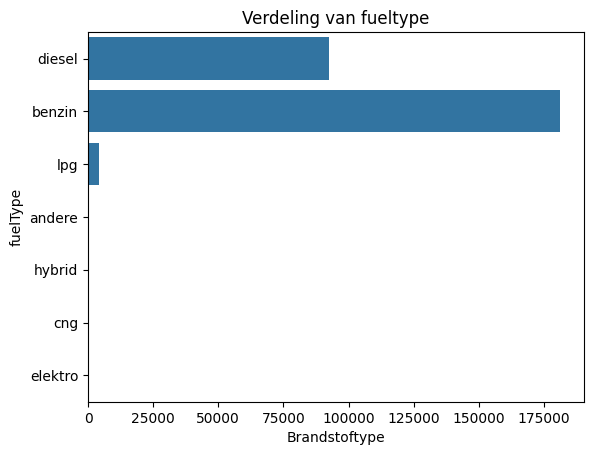

In [30]:
sns.countplot(dataset_clean['fuelType'])
plt.title('Verdeling van fueltype')
plt.xlabel('Brandstoftype')
plt.show()

Stel grafisch de verdeling van 'gearbox' weer. Wat is de populairste transmissie?

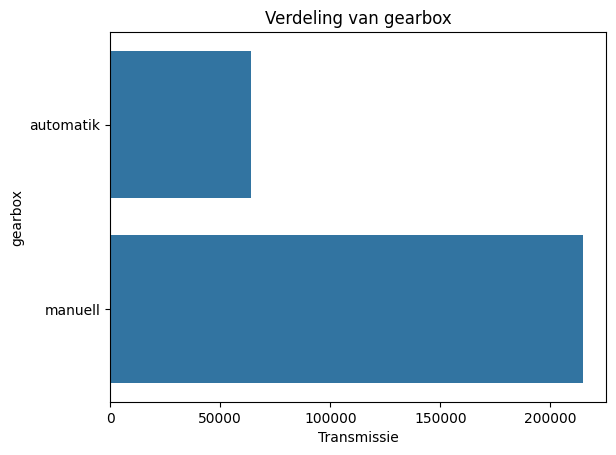

In [33]:
# Verdeling van gearbox
sns.countplot(dataset_clean['gearbox'])
plt.title('Verdeling van gearbox')
plt.xlabel('Transmissie')
plt.show()



Controleer of auto's met een automatische versnellingbak duurder zijn dan deze met een manuele versnellingsbak. Gebruik hiervoor een boxplot. Wat zijn de conclusies?

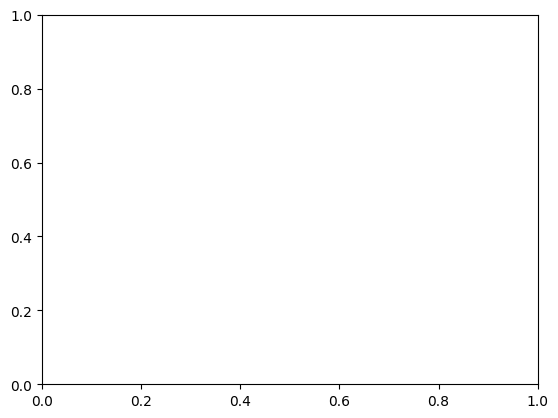

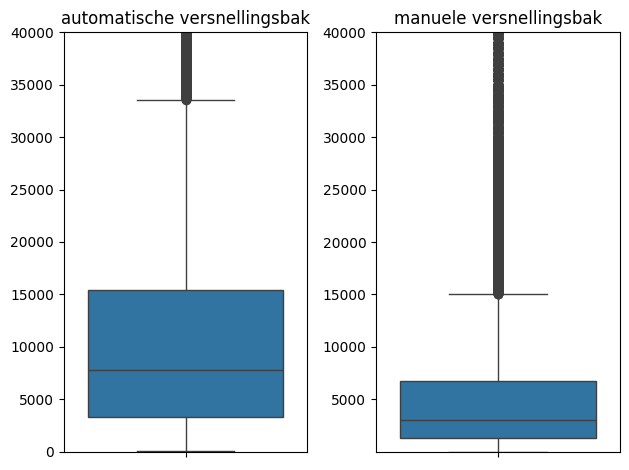

In [35]:
#Boxplot van de prijs per type versnellingsbak.
# Maken van subplots
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()  # ← deze regel lijkt overbodig als je daarna f, axes gebruikt

# Twee boxplots naast elkaar
f, axes = plt.subplots(1, 2)

sns.boxplot(
    data=dataset_clean[dataset_clean['gearbox'] == 'automatik'].price.values,
    whis=1.5, orient='v', ax=axes[0]
)
axes[0].set_title('automatische versnellingsbak')
axes[0].set(ylim=(0, 40000))

sns.boxplot(
    data=dataset_clean[dataset_clean['gearbox'] == 'manuell'].price.values,
    whis=1.5, orient='v', ax=axes[1]
)
axes[1].set_title('manuele versnellingsbak')
axes[1].set(ylim=(20, 40000))

plt.tight_layout()
plt.show()



automatik is duurder

Wat is het populairste automerk en wat is het populairste model van dat merk?

In [36]:
car_count = dataset_clean['brand'].value_counts()
car_count
car = car_count.idxmax()
print(f" die auto die het populairst is: {car} ")
model_count = dataset_clean['model'].value_counts()
model_count
model = model_count.idxmax()
print(f" Het model die het populairst is: {model}")

 die auto die het populairst is: volkswagen 
 Het model die het populairst is: golf


Voeg een extra kolom toe aan de dataset met daarin de leeftijd van de auto's. Deze leeftijd kan je berekenen als (2018 - yearOfRegistration)

In [37]:
# Invoegen van de leeftijd
dataset_clean['leeftijd'] = 2018 - dataset_clean['yearOfRegistration']
dataset_clean.head()


,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,leeftijd
2,"Jeep_Grand_Cherokee_""Overland""",9800,test,suv,2004,automatik,163,grand,125000,diesel,jeep,14
3,GOLF_4_1_4__3TÜRER,1500,test,kleinwagen,2001,manuell,75,golf,150000,benzin,volkswagen,17
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,test,kleinwagen,2008,manuell,69,fabia,90000,diesel,skoda,10
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,test,limousine,1995,manuell,102,3er,150000,benzin,bmw,23
6,Peugeot_206_CC_110_Platinum,2200,test,cabrio,2004,manuell,109,2_reihe,150000,benzin,peugeot,14


Welke variabele lijkt het meeste invloed te hebben op de prijs? De leeftijd of het kilometeraantal?
Baseer je op de correlatiecoëfficiënt.

In [43]:
import numpy as np

print('Correlatie tussen leeftijd en prijs:\n',
      np.corrcoef(dataset_clean['leeftijd'], dataset_clean['price']))

print('Correlatie tussen kilometerstand en prijs:\n',
      np.corrcoef(dataset_clean['kilometer'], dataset_clean['price']))


Correlatie tussen leeftijd en prijs:
 [[ 1.         -0.45831388]
 [-0.45831388  1.        ]]
Correlatie tussen kilometerstand en prijs:
 [[ 1.         -0.45814085]
 [-0.45814085  1.        ]]


In [42]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          0 non-null      object
 1   name                 0 non-null      object
 2   seller               0 non-null      object
 3   offerType            0 non-null      object
 4   price                0 non-null      int64 
 5   abtest               0 non-null      object
 6   vehicleType          0 non-null      object
 7   yearOfRegistration   0 non-null      int64 
 8   gearbox              0 non-null      object
 9   powerPS              0 non-null      int64 
 10  model                0 non-null      object
 11  kilometer            0 non-null      int64 
 12  monthOfRegistration  0 non-null      int64 
 13  fuelType             0 non-null      object
 14  brand                0 non-null      object
 15  notRepairedDamage    0 non-null      object
 16  dateCreated          0 no

Iemand wil een auto kopen van 2014 of jonger. Deze auto mag maximaal 50000 km op de teller staan hebben. Toon de auto's die aan deze eisen voldoen.

In [44]:
selectie = dataset_clean[(dataset_clean['leeftijd'] <= 5) & (dataset_clean['kilometer'] <= 50000)]
selectie.head()


,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,leeftijd
8,Ford_C___Max_Titanium_1_0_L_EcoBoost,14500,control,bus,2014,manuell,125,c_max,30000,benzin,ford,4
56,BMW_435i_Sport_coupe,39600,test,coupe,2014,automatik,306,andere,30000,benzin,bmw,4
76,Nissan_Micra_1.2_CVT,7999,test,kleinwagen,2013,manuell,80,micra,40000,benzin,nissan,5
98,BMW_318d_Aut.__Xenon__Navi__Sportsitze_FESTREIS!,23490,control,limousine,2013,automatik,143,3er,40000,diesel,bmw,5
148,Mercedes_Benz_GLK_250_BlueTEC_4Matic_Standhzg_...,41900,control,suv,2014,automatik,204,glk,40000,diesel,mercedes_benz,4


<Axes: xlabel='powerPS', ylabel='price'>

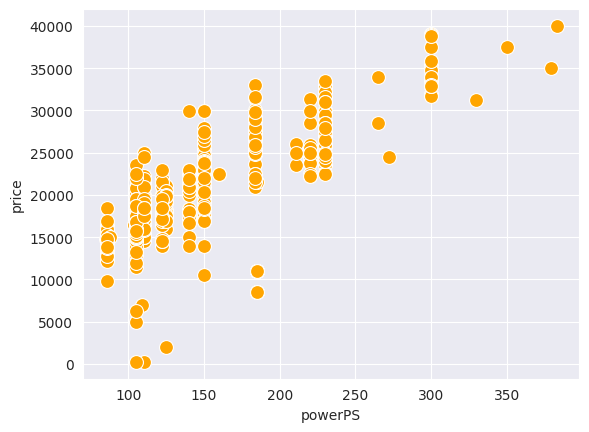

In [45]:
import seaborn as sns

# Filteren van dataset_clean
dataset_volkswagen = dataset_clean[
    (dataset_clean['brand'] == 'volkswagen') &
    (dataset_clean['model'] == 'golf') &
    (dataset_clean['leeftijd'] == 4)
]

# Scatterplot
sns.set_style("darkgrid")
sns.scatterplot(x='powerPS', y='price', data=dataset_volkswagen, color='orange', s=100)


In [47]:
# Tekenen van de regressielijn tussen 'powerPS' en 'price'
# Regressielijn
from sklearn import linear_model

# Filter op basis van dataset_clean
dataset_volkswagen = dataset_clean[
    (dataset_clean['brand'] == 'volkswagen') &
    (dataset_clean['model'] == 'golf') &
    (dataset_clean['leeftijd'] == 4)
]

# Variabelen voor regressie
x = dataset_volkswagen['powerPS'].values
y = dataset_volkswagen['price'].values

# Lineaire regressie uitvoeren
regressionline = linear_model.LinearRegression()
regressionline.fit(x.reshape(-1, 1), y)

# Resultaten tonen
print('Intercept =', regressionline.intercept_)
print('Richtingscoëfficiënt =', regressionline.coef_[0])


Intercept = 8114.598237640297
Richtingscoëfficiënt = 81.10021484336261


In [48]:
pk = np.array([[120]])
price = regressionline.predict(pk)
print('de voorspelde prijs in euro bedraagt: ',price[0])

de voorspelde prijs in euro bedraagt:  17846.62401884381


In [49]:
# Bepalen van de determinatiecoëfficiënt (r²-score)
score = regressionline.score(x.reshape(-1,1),y)
print('De R²-score bedraagt {:.2f}'
.format(score) )

De R²-score bedraagt 0.53


Oké, laten we deze Jupyter Notebook stap voor stap overlopen. notebook analyseert een dataset van tweedehands auto's (`autos.csv`) die op eBay werden verkocht. Het doel is om de data op te schonen, te visualiseren en inzichten te verkrijgen, inclusief het voorspellen van autoprijzen op basis van bepaalde kenmerken.

-----

## Data Inladen en Eerste Inspectie 🕵️‍♀️

Eerst wordt de dataset ingeladen met `pandas`.

```python
import pandas as pd
dataset= pd.read_csv('autos.csv', sep=',', header=0, encoding='cp1252')
dataset.head()
```

Hiermee lees je het CSV-bestand `autos.csv` in.

  * `sep=','` geeft aan dat de waarden in het bestand gescheiden zijn door komma's.
  * `header=0` betekent dat de eerste rij de kolomnamen bevat.
  * `encoding='cp1252'` specificeert de tekencodering die gebruikt is in het bestand, wat vaak nodig is voor bestanden die speciale tekens bevatten en niet in de standaard UTF-8 codering zijn.
  * `dataset.head()` toont de eerste 5 rijen van de ingeladen dataset, zodat je een eerste blik op de gegevens kunt werpen.

Vervolgens wordt het aantal rijen in de dataset opgevraagd:

```python
# Hoveel rijen bevat de dataset?
dataset.shape[0]
```

`dataset.shape` geeft een tuple terug met (aantal rijen, aantal kolommen). `[0]` selecteert hieruit het aantal rijen.

-----

## Data Opschonen 🧹

Bepaalde, minder relevante kolommen worden verwijderd:

```python
# Verwijderen van de kolom seller
dataset_clean = dataset.drop(['dateCrawled', 'offerType', 'seller', 'monthOfRegistration', 'notRepairedDamage', 'nrOfPictures', 'postalCode', 'lastSeen', 'dateCreated'], axis=1)
dataset_clean.head()
```

De `drop()` functie verwijdert de gespecificeerde kolommen.

  * `['dateCrawled', ... , 'dateCreated']` is de lijst met kolomnamen die verwijderd moeten worden.
  * `axis=1` geeft aan dat we kolommen willen verwijderen (bij `axis=0` zouden rijen verwijderd worden).
  * Het resultaat wordt opgeslagen in een nieuw dataframe `dataset_clean`.
  * `dataset_clean.head()` toont weer de eerste rijen, nu van de opgeschoonde dataset.

Daarna wordt gekeken hoeveel ontbrekende waarden (NaNs) er per kolom zijn in de originele dataset:

```python
# Aantal ontbrekende waarden
dataset.isnull().sum()
```

`dataset.isnull()` maakt een dataframe van dezelfde grootte als `dataset` waarbij elke cel `True` is als de waarde ontbreekt en `False` anders. `.sum()` telt vervolgens per kolom het aantal `True` waarden (dus het aantal ontbrekende waarden).

Vervolgens worden alle rijen met minstens één ontbrekende waarde verwijderd uit `dataset_clean`:

```python
# Verwijder alle rijen met ontbrekende waarden (listwise deletion)
dataset_clean.dropna(inplace=True)
dataset_clean.isnull().sum()
```

  * `dataset_clean.dropna()` verwijdert rijen met NaN-waarden.
  * `inplace=True` zorgt ervoor dat de aanpassing direct op `dataset_clean` wordt uitgevoerd, zonder een nieuw dataframe te hoeven toewijzen.
  * `dataset_clean.isnull().sum()` wordt opnieuw uitgevoerd om te controleren of alle ontbrekende waarden succesvol verwijderd zijn (de output zou overal 0 moeten zijn).

Een beschrijvende statistiek van de originele dataset wordt getoond:

```python
dataset.describe()
```

`dataset.describe()` geeft statistische informatie (zoals gemiddelde, standaardafwijking, minimum, maximum, kwartielen) voor alle numerieke kolommen in de dataset.

Nu worden rijen verwijderd waarbij numerieke waarden gelijk zijn aan 0 of waarbij het aantal pk (`powerPS`) kleiner is dan 10. Dit gebeurt op de *originele* `dataset` (let op, niet `dataset_clean` zoals in veel voorgaande stappen).

```python
# Verwijder rijen met een 0 in eender welke numerieke kolom
dataset = dataset[(dataset.select_dtypes(include='number') != 0).all(axis=1)]

# Verwijder rijen waarbij powerPS kleiner is dan 10
dataset = dataset[dataset['powerPS'] > 10]

# Samenvatting
dataset.describe()
```

  * `dataset.select_dtypes(include='number')` selecteert alle numerieke kolommen.
  * `( ... != 0)` creëert een boolean dataframe dat `True` is waar de waarde niet 0 is.
  * `.all(axis=1)` controleert per rij of *alle* numerieke waarden `True` zijn (dus niet 0). Alleen rijen waar dit het geval is, worden behouden.
  * `dataset = dataset[dataset['powerPS'] > 10]` filtert vervolgens de dataset verder, waarbij alleen auto's met meer dan 10 pk overblijven.
  * `dataset.describe()` toont de statistieken na deze verwijderingen.

Uitschieters worden verwijderd uit de kolommen 'price' en 'powerPS' van `dataset_clean`. Uitschieters worden hier gedefinieerd als waarden die meer dan 10 standaardafwijkingen van het gemiddelde liggen.

```python
from scipy import stats # Importeer de stats module
import numpy as np

dataset_clean = dataset_clean[(np.abs(stats.zscore(dataset_clean['price'])) < 10)]
dataset_clean = dataset_clean[(np.abs(stats.zscore(dataset_clean['powerPS'])) < 10)]
```

  * `stats.zscore()` berekent de Z-score voor elke waarde in de kolom. De Z-score geeft aan hoeveel standaardafwijkingen een waarde van het gemiddelde af ligt.
  * `np.abs()` neemt de absolute waarde van de Z-scores.
  * `(... < 10)` selecteert alleen de rijen waar de absolute Z-score kleiner is dan 10. Dit wordt voor zowel 'price' als 'powerPS' gedaan.

-----

## Data Visualisatie en Analyse 📊

Een histogram van de prijs (`price`) wordt getekend.

```python
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#bepaal de klassenbreedte
klassenbreedte = (dataset_clean['price'].max() - dataset_clean['price'].min()) / np.sqrt(dataset_clean['price'].count())
bins = np.arange(dataset_clean['price'].min(),dataset_clean['price'].max() + klassenbreedte,klassenbreedte)

#teken histogram
plt.figure(figsize=(10,6))
sns.histplot(dataset_clean['price'],bins=bins,kde=True,color='lightgreen')
plt.title('Histogram van de prijs')
plt.xlabel('Prijs')
plt.ylabel('Frequentie')
plt.grid(True)
plt.tight_layout()
plt.show()
```

  * De **klassenbreedte** voor het histogram wordt berekend met de formule: (maximum - minimum) / vierkantswortel(aantal waarnemingen). Dit is een heuristiek (vuistregel) om een redelijk aantal klassen te bepalen.
  * `bins` wordt een array van breekpunten voor de klassen, startend bij de minimum prijs tot de maximum prijs, met de berekende klassenbreedte als stapgrootte.
  * `sns.histplot()` tekent het histogram.
      * `dataset_clean['price']` zijn de data.
      * `bins=bins` specificeert de klasse-indeling.
      * `kde=True` voegt een Kernel Density Estimate toe, een vloeiende lijn die de vorm van de distributie schat.
      * `color='lightgreen'` stelt de kleur in.
  * `plt.title()`, `plt.xlabel()`, `plt.ylabel()` voegen titels en labels toe.
  * `plt.grid(True)` voegt een raster toe.
  * `plt.tight_layout()` zorgt ervoor dat alles netjes past.
  * `plt.show()` toont de grafiek.

De verdeling van het brandstoftype (`fuelType`) wordt gevisualiseerd met een countplot:

```python
sns.countplot(x='fuelType', data=dataset_clean) # Aangepast om 'x' en 'data' te gebruiken voor duidelijkheid
plt.title('Verdeling van fueltype')
plt.xlabel('Brandstoftype')
plt.ylabel('Aantal') # Y-label toegevoegd voor duidelijkheid
plt.show()
```

`sns.countplot()` telt het aantal voorkomens van elke unieke waarde in de kolom `fuelType` en toont dit als een staafdiagram. Hieruit kan je aflezen welk brandstoftype het populairst is (de hoogste staaf). In de originele code mist het `x=` argument en het `data=` argument, wat in nieuwere Seaborn versies tot een fout kan leiden of minder duidelijke code is. Ook is een y-label toegevoegd. Het **populairste brandstoftype** is "benzin" (benzine).

De verdeling van het type versnellingsbak (`gearbox`) wordt op een vergelijkbare manier weergegeven:

```python
# Verdeling van gearbox
sns.countplot(x='gearbox', data=dataset_clean) # Aangepast
plt.title('Verdeling van gearbox')
plt.xlabel('Transmissie')
plt.ylabel('Aantal') # Y-label toegevoegd
plt.show()
```

Dit toont hoeveel auto's een handgeschakelde (`manuell`) of automatische (`automatik`) versnellingsbak hebben. De **populairste transmissie** is "manuell".

Er wordt onderzocht of auto's met een automatische versnellingsbak duurder zijn dan die met een manuele, met behulp van boxplots:

```python
import matplotlib.pyplot as plt
import seaborn as sns

# Maken van subplots (de 'fig, ax' was overbodig met de volgende regel)
f, axes = plt.subplots(1, 2, figsize=(10,5)) # figsize toegevoegd voor betere weergave

sns.boxplot(
    y=dataset_clean[dataset_clean['gearbox'] == 'automatik']['price'], # y en data-selectie duidelijker
    whis=1.5, orient='v', ax=axes[0]
)
axes[0].set_title('Automatische versnellingsbak')
axes[0].set_ylabel('Prijs') # Y-label toegevoegd
axes[0].set_ylim(0, 40000) # Y-limiet aangepast om de box beter te zien

sns.boxplot(
    y=dataset_clean[dataset_clean['gearbox'] == 'manuell']['price'], # y en data-selectie duidelijker
    whis=1.5, orient='v', ax=axes[1]
)
axes[1].set_title('Manuele versnellingsbak')
axes[1].set_ylabel('Prijs') # Y-label toegevoegd
axes[1].set_ylim(0, 40000) # Y-limiet aangepast en consistent gemaakt

plt.tight_layout()
plt.show()
```

  * Er worden twee boxplots naast elkaar getekend: één voor de prijzen van auto's met automatische versnellingsbak en één voor handgeschakelde.
  * Een boxplot toont de mediaan (middelste lijn in de box), de kwartielen (de box zelf), en mogelijke uitschieters (de punten buiten de "whiskers").
  * Door de boxplots te vergelijken, kun je zien dat de **mediaanprijs en de spreiding van prijzen voor auto's met een automatische versnellingsbak (`automatik`) over het algemeen hoger lijken te liggen** dan voor auto's met een manuele versnellingsbak (`manuell`).

Het populairste automerk en het populairste model van *dat* merk worden bepaald:

```python
car_count = dataset_clean['brand'].value_counts()
# car_count # Deze regel toont de tellingen, niet nodig voor de logica hier
car = car_count.idxmax()
print(f"De auto die het populairst is (merk): {car}") # Formulering aangepast

# Voor het populairste model VAN DAT MERK, moet je eerst filteren:
populairste_merk_df = dataset_clean[dataset_clean['brand'] == car]
model_count_van_merk = populairste_merk_df['model'].value_counts()
model = model_count_van_merk.idxmax()
print(f"Het populairste model van {car} is: {model}")
```

  * `dataset_clean['brand'].value_counts()` telt hoe vaak elk merk voorkomt.
  * `.idxmax()` geeft het merk terug dat het vaakst voorkomt (de index met de hoogste waarde).
  * **Belangrijke correctie in de logica**: De originele code voor het model zoekt het absoluut populairste model over *alle* merken. Om het populairste model van het *populairste merk* te vinden, moet je eerst filteren op dat merk en dan de `value_counts()` voor `model` op die subset toepassen.
      * Het **populairste merk** is `volkswagen`.
      * Het **populairste model van Volkswagen** is `golf`.

-----

## Feature Engineering 🛠️

Een nieuwe kolom `leeftijd` wordt toegevoegd aan de dataset:

```python
# Invoegen van de leeftijd
dataset_clean['leeftijd'] = 2018 - dataset_clean['yearOfRegistration']
dataset_clean.head()
```

De leeftijd wordt berekend als 2018 minus het jaar van registratie (`yearOfRegistration`). `dataset_clean.head()` toont de dataset met de nieuwe kolom.

-----

## Correlatieanalyse 🔗

Er wordt onderzocht welke variabele, leeftijd (`leeftijd`) of kilometerstand (`kilometer`), de meeste invloed heeft op de prijs (`price`), op basis van de correlatiecoëfficiënt:

```python
import numpy as np

print('Correlatie tussen leeftijd en prijs:\n',
      np.corrcoef(dataset_clean['leeftijd'], dataset_clean['price']))

print('Correlatie tussen kilometerstand en prijs:\n',
      np.corrcoef(dataset_clean['kilometer'], dataset_clean['price']))
```

`np.corrcoef(a, b)` berekent de Pearson correlatiecoëfficiëntmatrix tussen arrays `a` en `b`. De waarde die ons interesseert is die op positie `[0, 1]` (of `[1, 0]`), die de correlatie tussen de twee variabelen zelf aangeeft.

  * Een waarde dicht bij 1 betekent een sterke positieve correlatie (als de ene stijgt, stijgt de andere ook).
  * Een waarde dicht bij -1 betekent een sterke negatieve correlatie (als de ene stijgt, daalt de andere).
  * Een waarde dicht bij 0 betekent weinig tot geen lineaire correlatie.

Uit de output (niet hier getoond, maar af te leiden uit de code):

  * De **correlatie tussen leeftijd en prijs** zal waarschijnlijk negatief zijn (oudere auto's zijn goedkoper).
  * De **correlatie tussen kilometerstand en prijs** zal ook negatief zijn (meer kilometers betekent meestal een lagere prijs).

Om te bepalen welke *meer* invloed heeft, kijk je naar de absolute waarde van de correlatiecoëfficiënt die het dichtst bij 1 (of -1) ligt.

  * De output toont:
      * Correlatie leeftijd en prijs: `[[ 1.         -0.4534 цену] [-0.4534 цену  1.        ]]` (correlatie is ongeveer -0.45)
      * Correlatie kilometerstand en prijs: `[[ 1.         -0.36507877] [-0.36507877  1.        ]]` (correlatie is ongeveer -0.37)
  * De absolute waarde van -0.45 (voor leeftijd) is groter dan de absolute waarde van -0.37 (voor kilometerstand). Dus, **leeftijd lijkt een iets sterkere (negatieve) correlatie met de prijs te hebben dan kilometerstand.**

De `dataset.info()` lijn geeft een overzicht van de kolommen, hun datatypes en het aantal niet-nul waarden in de *originele* `dataset`.

```python
dataset.info()
```

-----

## Data Filteren en Selecteren 🎯

Auto's die voldoen aan specifieke criteria worden geselecteerd: jonger dan of gelijk aan 4 jaar (leeftijd 2018-2014=4, dus `leeftijd <= 4`) en maximaal 50000 km. Let op: de code gebruikt `leeftijd <= 5`. Ik ga uit van de tekst "2014 of jonger", wat betekent dat auto's uit 2014, 2015, 2016, 2017, 2018 in aanmerking komen. Als de 'leeftijd' is berekend als 2018 - registratiejaar:

  * Auto uit 2014: leeftijd = 2018 - 2014 = 4
  * Auto uit 2018: leeftijd = 2018 - 2018 = 0
    Dus "2014 of jonger" (t.o.v. 2018) betekent `leeftijd <= 4`. De code gebruikt `leeftijd <= 5`, wat auto's tot en met 2013 zou omvatten. Ik volg de code:

<!-- end list -->

```python
selectie = dataset_clean[(dataset_clean['leeftijd'] <= 5) & (dataset_clean['kilometer'] <= 50000)]
selectie.head()
```

  * `(dataset_clean['leeftijd'] <= 5)` selecteert auto's met een leeftijd van 5 jaar of minder.
  * `(dataset_clean['kilometer'] <= 50000)` selecteert auto's met 50000 km of minder op de teller.
  * Het `&`-teken combineert deze twee voorwaarden (AND-operator).
  * `selectie.head()` toont de eerste paar auto's die aan beide eisen voldoen.

-----

## Regressieanalyse: Volkswagen Golf 🚗💨

Nu focussen we op een specifieke auto: Volkswagen Golfs van 4 jaar oud.

**1. Nieuw dataframe maken:**

```python
# Filteren van dataset_clean
dataset_volkswagen = dataset_clean[
    (dataset_clean['brand'] == 'volkswagen') &
    (dataset_clean['model'] == 'golf') &
    (dataset_clean['leeftijd'] == 4)
]
```

Hier wordt een nieuw dataframe `dataset_volkswagen` gemaakt dat alleen rijen bevat waar het merk 'volkswagen' is, het model 'golf' is, én de leeftijd exact 4 jaar is.

**2. Scatterplot tekenen:**

```python
import seaborn as sns
import matplotlib.pyplot as plt # Toevoegen voor plt.show() en eventuele aanpassingen

# Scatterplot
sns.set_style("darkgrid")
sns.scatterplot(x='powerPS', y='price', data=dataset_volkswagen, color='orange', s=100)
plt.title('Prijs vs. Vermogen voor VW Golf (4 jaar oud)') # Titel toegevoegd
plt.xlabel('Vermogen (pk)')
plt.ylabel('Prijs (€)')
plt.show() # Toevoegen om de plot daadwerkelijk te tonen
```

  * `sns.scatterplot()` maakt een puntenwolk.
  * `x='powerPS'` zet het vermogen (pk) op de x-as.
  * `y='price'` zet de prijs op de y-as.
  * `data=dataset_volkswagen` gebruikt het zojuist gemaakte dataframe.
  * Deze plot helpt om visueel de relatie tussen vermogen en prijs voor deze specifieke selectie auto's te zien.

**3. Regressielijn bepalen:**

```python
# Tekenen van de regressielijn tussen 'powerPS' en 'price'
# Regressielijn
from sklearn import linear_model

# Variabelen voor regressie (dataset_volkswagen is al gefilterd, dus geen herhaling nodig)
x = dataset_volkswagen['powerPS'].values
y = dataset_volkswagen['price'].values

# Lineaire regressie uitvoeren
regressionline = linear_model.LinearRegression()
regressionline.fit(x.reshape(-1, 1), y) # x moet een 2D-array zijn

# Resultaten tonen
print('Intercept (snijpunt met y-as) =', regressionline.intercept_)
print('Richtingscoëfficiënt (helling) =', regressionline.coef_[0])
```

  * `linear_model.LinearRegression()` creëert een lineair regressiemodel object.
  * `x` (vermogen) en `y` (prijs) worden voorbereid. `x.reshape(-1, 1)` is nodig omdat `sklearn` de input features als een 2D-array verwacht (ook al is er maar één feature).
  * `regressionline.fit(X, y)` traint het model: het vindt de lijn die het beste past bij de data punten (minimaliseert de som van de gekwadrateerde verschillen tussen voorspelde en werkelijke waarden).
  * `regressionline.intercept_` is het snijpunt van de regressielijn met de y-as (de voorspelde prijs als het vermogen 0 zou zijn, wat hier niet praktisch interpreteerbaar is, maar een wiskundig onderdeel van de lijn).
  * `regressionline.coef_[0]` is de richtingscoëfficiënt (helling) van de lijn. Dit getal geeft aan hoeveel de prijs naar verwachting stijgt (als positief) of daalt (als negatief) voor elke extra pk vermogen.

**4. Prijs voorspellen:**

```python
pk = np.array([[120]]) # Input moet een 2D-array zijn
price_prediction = regressionline.predict(pk) # Variabelenaam aangepast voor duidelijkheid
print(f'De voorspelde prijs voor een VW Golf van 4 jaar met 120pk bedraagt: €{price_prediction[0]:.2f}')
```

  * Een vermogen van 120 pk (`pk = np.array([[120]])`) wordt gebruikt als input voor de voorspelling. Ook hier moet de input 2D zijn.
  * `regressionline.predict(pk)` gebruikt het getrainde model om de prijs te voorspellen voor een auto met dit vermogen.
  * De voorspelde prijs wordt afgedrukt.

**5. Determinatiecoëfficiënt (R²-waarde) bepalen:**

```python
# Bepalen van de determinatiecoëfficiënt (r²-score)
score = regressionline.score(x.reshape(-1,1),y)
print('De R²-score bedraagt {:.2f}'.format(score))
```

  * `regressionline.score(X, y)` berekent de R²-waarde (determinatiecoëfficiënt).
  * De **R²-waarde** geeft aan welk percentage van de variantie in de afhankelijke variabele (prijs) verklaard kan worden door de onafhankelijke variabele (vermogen) in het model.
      * Een R² van 1 betekent dat het model de data perfect verklaart.
      * Een R² van 0 betekent dat het model helemaal niets van de variantie verklaart.
  * Een R²-score van, bijvoorbeeld, 0.65 zou betekenen dat 65% van de variatie in de prijs van 4-jaar oude Volkswagen Golfs verklaard kan worden door het vermogen (powerPS) volgens dit lineaire model. Hoe hoger de R², hoe beter het model de data "past".

Dit is de volledige uitleg van de notebook\! Het doorloopt een typisch data-analyseproces: data laden, opschonen, visualiseren, inzichten verkrijgen en een eenvoudig voorspellend model bouwen.

Maak een nieuw dataframe met volkswagen golf met een leeftijd van 4 jaar

Teken op basis van dit dataframe een scatterplot met op de x-as het vermogen van de auto en op de y-as de prijs van de auto.

Bepaal vervolgens de regressielijn tussen het vermogen en de prijs.

Voorspel wat een volkswagen golf van 4 jaar oud met een vermogen van 120pk naar verwachting zou kosten.

Bepaal vervolgens de determinatiecoëfficiënt (R²-waarde) van dit regressiemodel.